In [9]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import random

In [26]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [27]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,1.564898,-0.061307,0.502524,1.443153,0.625730,1
1,0.683949,0.171892,0.135561,3.004894,-0.064888,0
2,1.272421,-0.072647,-2.000145,0.378183,2.366486,0
3,2.066804,-1.956599,-0.846130,0.747078,1.335989,1
4,-0.188493,1.604999,-1.748452,0.216707,2.098810,1


In [28]:
# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [29]:
# function for feature sampling
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [30]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [31]:
df1 = sample_rows(df,0.1)

In [32]:
df2 = sample_rows(df, 0.1)

In [33]:
df3 = sample_rows(df, 0.1)

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [42]:
clf1.fit(df1.iloc[:,0:5],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:5],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:5],df3.iloc[:,-1])

DecisionTreeClassifier()

In [43]:
from sklearn.tree import plot_tree

[Text(0.6, 0.8333333333333334, 'x[3] <= 0.876\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.4, 0.5, 'x[1] <= -2.308\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.7, 0.6666666666666667, '  False')]

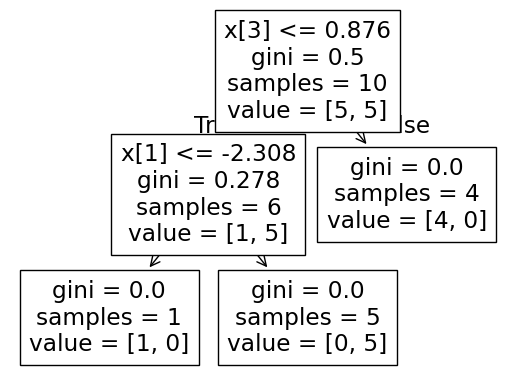

In [44]:
plot_tree(clf1)

[Text(0.5, 0.75, 'x[3] <= 1.457\ngini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.625, 0.5, '  False')]

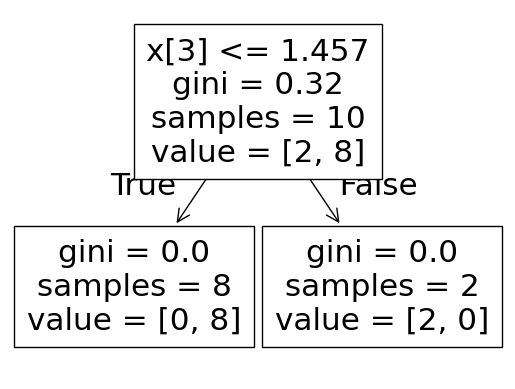

In [45]:
plot_tree(clf2)

[Text(0.5, 0.75, 'x[3] <= 1.457\ngini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.625, 0.5, '  False')]

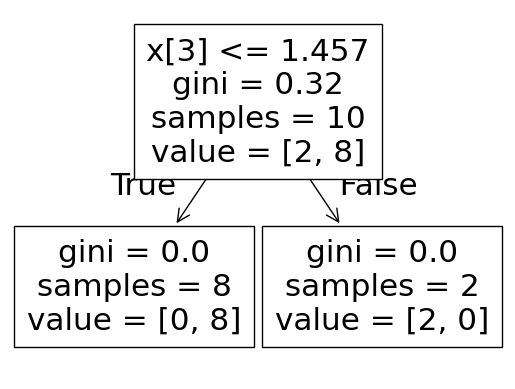

In [46]:
plot_tree(clf2)

In [47]:
clf1.predict(np.array([0.551380, -1.876815, -1.807618, -1.557932, -0.039809]).reshape(1, 5))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [48]:
clf2.predict(np.array([0.551380, -1.876815, -1.807618, -1.557932, -0.039809]).reshape(1, 5))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [49]:
clf3.predict(np.array([0.551380, -1.876815, -1.807618, -1.557932, -0.039809]).reshape(1, 5))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])